## 17.5 Homework

Write a program to find the ground state of LJ potential for N=3 (assuming $\epsilon$ = $\sigma$ = 1)

[Refenece](http://doye.chem.ox.ac.uk/jon/structures/LJ/tables.150.html)


In [11]:
import numpy as np

# standard LJ potential from lec 17
#where r= distance between 2 atoms
def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

In [101]:
#because there are 3 ways to make pairs out of 3 atoms, 
#there are 3 distances that we need to keep in mind.

#positions has to be a 3*N array where the position of each atom is listed in order
#exp: [x0,y0,z0,x1,y1,z1,...,xn,yn,zn]
def total_LJ(pos):
    
    E = 0
    N = int(len(pos)/3) #infer the number of atoms from the length of given array
    pos1 = np.zeros(3)
    pos2 = np.zeros(3)
    
    for i in range(N-1):
        for j in range (i+1, N):
            pos1 = [pos[i*3], pos[i*3 + 1] , pos[i*3 + 2]]
            pos2 = [pos[j*3], pos[j*3 + 1] , pos[j*3 + 2]]
            dist = np.sqrt((pos1[0]-pos2[0])**2 + (pos1[1]-pos2[1])**2 + (pos1[2]-pos2[2])**2)
            E += LJ(dist)
#             print(pos1, pos2, E)

            
    return E

In [106]:
starting_pos = np.random.random_sample(3*3)
print (starting_pos)

[0.06840745 0.8572212  0.78107196 0.51840483 0.43111737 0.1805687
 0.73089534 0.24478748 0.10001788]


In [111]:
from scipy.optimize import minimize

# print(starting_pos)

minimum = minimize(total_LJ, starting_pos, method='CG', tol=1e-4)
print("Min found at: ", minimum.fun)

Min found at:  -2.9999999998621685


http://doye.chem.ox.ac.uk/jon/structures/LJ/tables.150.html

Says that it should be -3 so this is resonably close

## 18.3 Homework

Try different minimization methods in scipy on larger systems ($N$ up to 20), and show 
- 1 the average number of attempts to find the ground state
- 2 the time costs


### Optional
try to improve the code to make it run faster, analyze the most time consuming part and give your solution


In [116]:
#I can just use my function from before with a new starting position
starting_pos = np.random.random_sample(12*3)
# print(starting_pos)

In [117]:
#first try
minimum = minimize(total_LJ, starting_pos, method='CG', tol=1e-4)
print("Min found at: ", minimum.fun)

Min found at:  -35.465899410967424


http://doye.chem.ox.ac.uk/jon/structures/LJ/tables.150.html

says it should be -37.967600 which means we are a little off the mark

(I have later realized that getting -35 was a very good guess in comparison to more common local min)

Because this could be due to falling into a local min, lets try it many times to try and find the global min

In [121]:
#time it takes to do it once
import time

timer_start = time.perf_counter()
minimum = minimize(total_LJ, np.random.random_sample(12*3), method='CG', tol=1e-4)
timer_end = time.perf_counter()

time = timer_end - timer_start
print("Min found at: ", minimum.fun, "in: ", time, "seconds")

Min found at:  -15.533060324474453 in:  6.346255000000383 seconds


In [159]:
#trying to do it many times
import time

N = 100
timer_start = time.perf_counter()
hist = []
# global_min = 0

for i in range(N):
    minimum = minimize(total_LJ, np.random.random_sample(12*3), method='CG', tol=1e-4)
    hist.append(minimum.fun)
    if (global_min > minimum.fun):
        global_min=minimum.fun
#     hist.append(np.random.random_sample(1))
timer_end = time.perf_counter()

time = timer_end - timer_start
print("Min found at: ", minimum.fun, "in: ", time, "seconds")
# print(hist)

Min found at:  -9.103942026089081 in:  464.8630788999981 seconds


In [163]:
#the min found was wrong for some reason

lowest = hist[0]
for i in range(len(hist)):
    if hist[i] < lowest:
        lowest = hist[i]
        
print ("the real lowest found", lowest)

the real lowest found -37.967599562309076


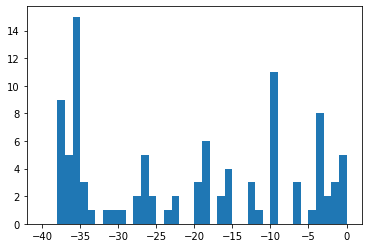

In [160]:
import matplotlib.pyplot as plt

# binsize = [-40, -35, -30, -25, -20, -15, -10, -5, 0]
binsize = []
for i in range(41):
    binsize.append(-40+i)
# print(hist)
plt.hist(hist, bins=binsize)
plt.show()